In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('Pizza_Restaurants_and_the_Pizza_They_Sell.csv')
data.head()

,id,address,categories,primaryCategories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.description,menus.name,name,postalCode,priceRangeMin,priceRangeMax,province
0,AVz3Y-7h3D1zeR_xDAqm,4203 E Kiehl Ave,"Pizza,Restaurant,American restaurants,Pizza Pl...",Accommodation & Food Services,Sherwood,US,us/ar/sherwood/4203ekiehlave/-1051391616,34.832300,-92.183800,http://www.citysearch.com/profile/menu/1550074...,7.98,7.98,NaN,Cheese Pizza,Shotgun Dans Pizza,72120,0,25,AR
1,AVweGPFF_7pvs4fzAAzQ,25 E Camelback Rd,"Pizza,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,US,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,-112.073044,NaN,6.00,6.00,NaN,Pizza Cookie,Sauce Pizza Wine,85012,0,25,AZ
2,AVwdRGa9_7pvs4fz4E3K,3703 Paxton Ave,"Restaurant,Pizza Place,Restaurants",Accommodation & Food Services,Cincinnati,US,us/oh/cincinnati/3703paxtonave/-619797122,39.144883,-84.432685,http://www.citysearch.com/profile/menu/8160503...,6.49,6.49,a saucelessampcomma double cheese pizza with a...,Pizza Blanca,Mios Pizzeria,45209,0,25,OH
3,AVwdX4psIN2L1WUfvJB1,30495 John R Rd,"Pizza,Carry-out food,Pizza Place,Restaurants",Accommodation & Food Services,Madison Heights,US,us/mi/madisonheights/30495johnrrd/-874863116,42.516669,-83.106630,NaN,5.99,5.99,NaN,Small Pizza,Hungry Howies Pizza,48071,25,40,MI
4,AVwdaeTtkufWRAb55pSH,3600 Eastern Ave,"Pizza,American restaurants,Pizza Place,Pizza e...",Accommodation & Food Services,Baltimore,US,us/md/baltimore/3600easternave/-1270965359,39.286630,-76.566984,NaN,5.49,5.49,NaN,Pizza Sub,Spartan Pizzeria,21224,0,25,MD


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data_clus2 = data.iloc[:,16:18]
data_clus2.head()

,priceRangeMin,priceRangeMax
0,0,25
1,0,25
2,0,25
3,25,40
4,0,25


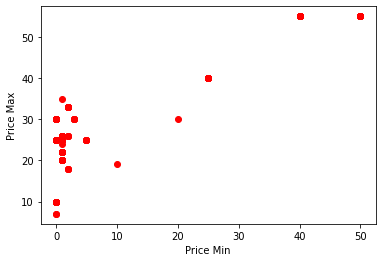

In [ ]:
plt.scatter(data_clus2.iloc[:,0],data_clus2.iloc[:,1],c='red')
plt.xlabel('Price Min')
plt.ylabel('Price Max')
plt.show()

In [ ]:
clus_array2 = np.array(data_clus2)
print(clus_array2)

[[ 0 25]
 [ 0 25]
 [ 0 25]
 ...
 [ 0 25]
 [ 0 25]
 [ 0 25]]


In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(clus_array2)
data_scaled

array([[0.   , 0.375],
       [0.   , 0.375],
       [0.   , 0.375],
       ...,
       [0.   , 0.375],
       [0.   , 0.375],
       [0.   , 0.375]])

In [ ]:
distortions = []
K = range (1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(data_scaled)
  distortions.append(kmeanModel.inertia_)

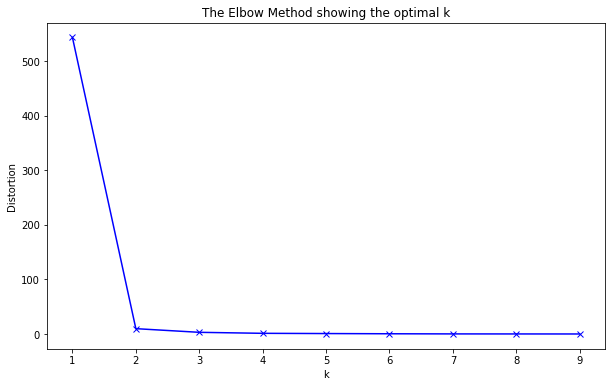

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(data_scaled)
# KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
#        n_clusters=5, n_init=10,n_jobs=None,precompute_distances='auto',
#        random_state=None, tol=0.0001, verbose=0)
print(kmeanModel.cluster_centers_)

[[5.38687561e-04 3.74290932e-01]
 [5.05840611e-01 6.92503639e-01]]


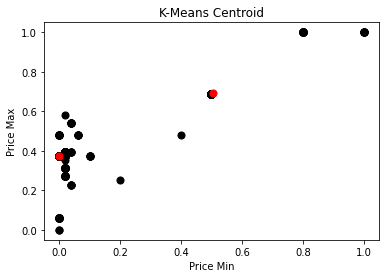

In [ ]:
plt.scatter(data_scaled[:,0], data_scaled[:,1], s=50, c='black', marker='o', alpha=1)
centers = kmeanModel.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=50, alpha=1, marker='o');
plt.title('K-Means Centroid')
plt.xlabel('Price Min')
plt.ylabel('Price Max')
plt.show()

In [ ]:
y_kmeans = kmeanModel.predict(data_scaled)

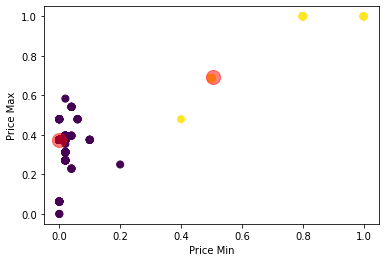

In [ ]:
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeanModel.cluster_centers_
plt.scatter(centers[:, 0], centers[:,1], c='red', s=200, alpha=0.5);
plt.xlabel('Price Min')
plt.ylabel('Price Max')
plt.show()

In [ ]:
result = pd.DataFrame(data = y_kmeans)
result.columns = ['cluster']
result.head()

,cluster
0,0
1,0
2,0
3,1
4,0


In [ ]:
output = pd.concat([data,result], axis=1)
output.head()

,id,address,categories,primaryCategories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.description,menus.name,name,postalCode,priceRangeMin,priceRangeMax,province,cluster
0,AVz3Y-7h3D1zeR_xDAqm,4203 E Kiehl Ave,"Pizza,Restaurant,American restaurants,Pizza Pl...",Accommodation & Food Services,Sherwood,US,us/ar/sherwood/4203ekiehlave/-1051391616,34.832300,-92.183800,http://www.citysearch.com/profile/menu/1550074...,7.98,7.98,NaN,Cheese Pizza,Shotgun Dans Pizza,72120,0,25,AR,0
1,AVweGPFF_7pvs4fzAAzQ,25 E Camelback Rd,"Pizza,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,US,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,-112.073044,NaN,6.00,6.00,NaN,Pizza Cookie,Sauce Pizza Wine,85012,0,25,AZ,0
2,AVwdRGa9_7pvs4fz4E3K,3703 Paxton Ave,"Restaurant,Pizza Place,Restaurants",Accommodation & Food Services,Cincinnati,US,us/oh/cincinnati/3703paxtonave/-619797122,39.144883,-84.432685,http://www.citysearch.com/profile/menu/8160503...,6.49,6.49,a saucelessampcomma double cheese pizza with a...,Pizza Blanca,Mios Pizzeria,45209,0,25,OH,0
3,AVwdX4psIN2L1WUfvJB1,30495 John R Rd,"Pizza,Carry-out food,Pizza Place,Restaurants",Accommodation & Food Services,Madison Heights,US,us/mi/madisonheights/30495johnrrd/-874863116,42.516669,-83.106630,NaN,5.99,5.99,NaN,Small Pizza,Hungry Howies Pizza,48071,25,40,MI,1
4,AVwdaeTtkufWRAb55pSH,3600 Eastern Ave,"Pizza,American restaurants,Pizza Place,Pizza e...",Accommodation & Food Services,Baltimore,US,us/md/baltimore/3600easternave/-1270965359,39.286630,-76.566984,NaN,5.49,5.49,NaN,Pizza Sub,Spartan Pizzeria,21224,0,25,MD,0


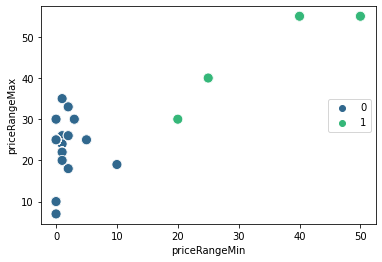

In [ ]:
import seaborn as sns
sns.scatterplot(x=output.iloc[:,16], y=output.iloc[:,17], hue=output.iloc[:,19],
                data=output, palette='viridis', s=100, legend='full');
plt.legend(loc='center right', fontsize='10');